In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [86]:
df = pd.read_csv('fcc-forum-pageviews.csv')

In [87]:
df.set_index('date', drop=True, inplace=True)
df.index = [pd.Timestamp(d) for d in df.index]

In [88]:
df.head()

,value
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [89]:
df.shape

(1304, 1)

#### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [91]:
df = df[(df['value']>=df['value'].quantile(0.025)) & (df['value']<=df['value'].quantile(0.975))]

In [92]:
df

,value
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


#### Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

In [96]:
def draw_line_plot():
    fig,axs = plt.subplots(1,1)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.plot(df.index, df['value'],color='r')
    fig.savefig('line_plot.png')
    #return fig

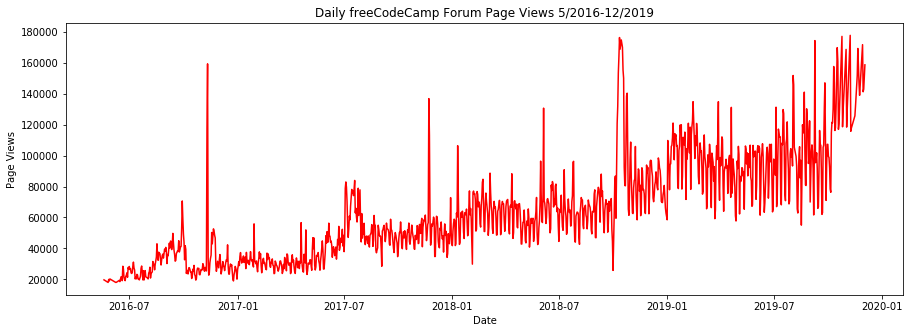

In [97]:
draw_line_plot()

#### Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [98]:
def draw_bar_plot():
    df_bar = df.copy()
    month_names = ['January','February','March','April','May','June','July','August','September','October','November','December']
    labels = [2016,2017,2018,2019]
    months = np.zeros([12,4])
    
    for i in range(12):
        for j, year in enumerate(labels):
            t = df[df.index.year == year]
            months[i][j] = t[t.index.month == i].value.mean()
            
    x = np.arange(len(labels))
    width = 0.7
    fig,ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    for i,month in enumerate(months):
        ax.bar(x-(width * (12-i)/12) , months[i], width/12, label = month_names[i])
    ax.set_xlabel("Average Page Views")
    ax.set_ylabel("Year")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(title='Months')
    
    fig.savefig('bar_plot.png')
    #return fig 
    

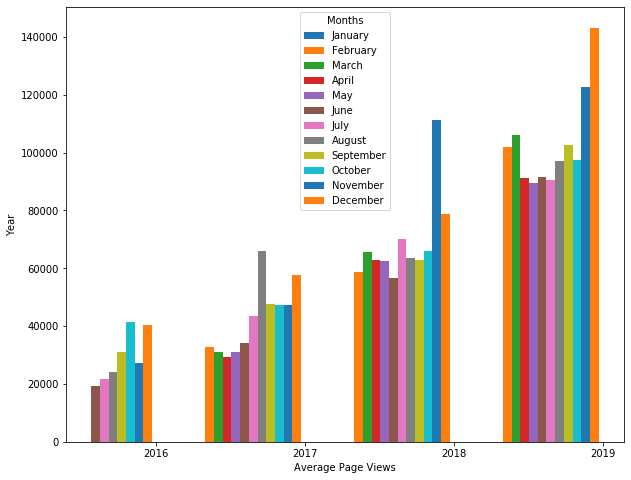

In [99]:
draw_bar_plot()

###### something I was just trying out

In [74]:
df.index.year.value_counts()

2017    365
2018    362
2019    306
2016    205
dtype: int64

In [75]:
df['year'] = df.index.year

In [76]:
df['year']

2016-05-19    2016
2016-05-26    2016
2016-05-27    2016
2016-05-28    2016
2016-05-29    2016
              ... 
2019-11-24    2019
2019-11-29    2019
2019-11-30    2019
2019-12-01    2019
2019-12-03    2019
Name: year, Length: 1238, dtype: int64

In [77]:
df['month'] = df.index.month

In [78]:
df['month']

2016-05-19     5
2016-05-26     5
2016-05-27     5
2016-05-28     5
2016-05-29     5
              ..
2019-11-24    11
2019-11-29    11
2019-11-30    11
2019-12-01    12
2019-12-03    12
Name: month, Length: 1238, dtype: int64

In [84]:
df.groupby(['month','year'], as_index=False).agg({"value": "mean"})

,month,year,value
0,1,2017,32785.161290
1,1,2018,58580.096774
2,1,2019,102056.516129
3,2,2017,31113.071429
4,2,2018,65679.000000
5,2,2019,105968.357143
6,3,2017,29369.096774
7,3,2018,62693.774194
8,3,2019,91214.483871
9,4,2017,30878.733333


##### Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [109]:
def draw_box_plot():
    df_box = df.copy()
    df_box['date'] = df_box.index
    df_box.reset_index( inplace = True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    df_box['smonth'] = [d.strftime('%m') for d in df_box.date]
    df_box = df_box.sort_values(by='smonth')
    
    fig,(ax1, ax2) = plt.subplots(1,2)
    fig.set_figwidth(10)
    fig.set_figheight(15)
    
    ax1.set_title("Year wise box plot (Trend)")
    ax2.set_title("Month-wise Box Plot (Seasonality)")

    ax1 = sns.boxplot(x=df_box.year, y=df_box.value, ax=ax1)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')

    ax2 = sns.boxplot(x="month", y="value", data=df_box, ax=ax2)
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')

    fig.savefig('box_plot.png')
    #return fig

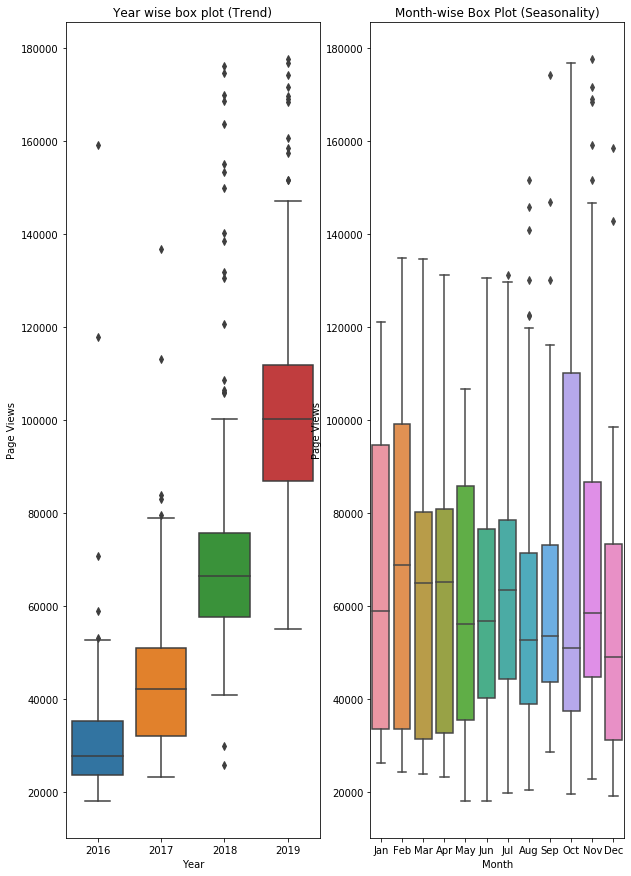

In [110]:
draw_box_plot()